# Cefron Analytical Solutions to the GS equation

## Introduction
Cefron found analytical solutions to the Grad-Shafranov equation. We are going to cover the important aspects of his derivation and compare process/solution of his approach to that of PINN's approach. <br>
Here's the Grad-Shafranov equation: <br>
$$ 

R\frac{\partial}{\partial R}
                        \left(
                            \frac{1}{R}
                            \frac{\partial \Psi}{\partial R}
                        \right)\,
                        +\, 
                        \frac{\partial^2 \Psi}{\partial Z^2}\,
                        =\,
-\mu_{0}R^2\frac{dp}{d\Psi}-F\frac{dF}{d\Psi}
$$ 
Both p and F are free functions of  $\Psi$ which, along with the boundary conditions, determine the nature of the equilibrium. <br>
Through the normalization $R=R_{0}x, Z=R_{0}y$, and $\Psi = \Psi_{0}\psi$ where $R_{0}$ is the major radius of the palsma and $\Psi_{0}$ is an arbitrary constant. GS equation becomes:
$$ 

x\frac{\partial}{\partial x}
                        \left(
                            \frac{1}{x}
                            \frac{\partial \Psi}{\partial x}
                        \right)\,
                        +\, 
                        \frac{\partial^2 \Psi}{\partial y^2}\,
                        =\,
-\mu_{0}\frac{R_{0}^4}{\Psi_{0}^2}x^2\frac{dp}{d\Psi}-\frac{R_{0}^2}{\Psi_{0}^2}F\frac{dF}{d\Psi}
 $$ 
Now we are going to choose Solov'ev profiles:
$$
-\mu_{0}\frac{R_{0}^4}{\Psi_{0}^2}x^2\frac{dp}{d\Psi}\,
    = C 
$$
$$
\frac{R_{0}^2}{\Psi_{0}^2}F\frac{dF}{d\Psi}\,
    = A
$$

Now let's look at the boundary constrations and boundary cross section. The parametric equations for the boundary cross section are:
$$
x = 1 + \varepsilon \cos(\tau+\alpha \sin\tau) \\
y = \varepsilon\kappa\sin(\tau)
$$
$\tau$ is a parameter covering the range $0\leq\tau\leq 2\pi$. $\varepsilon$ is the inverse aspect ratio $a/R_{0}$, $\kappa$ is the elongation, and $\sin\alpha = \delta$ is the triangularity. For convex plasma surfaces the triangularity is limited to the range $\delta\leq\sin(1)\approx0.841$. <br>
Let's plot this parametric equations.

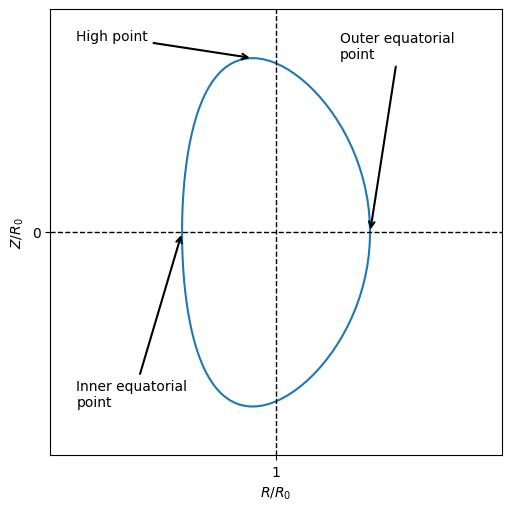

In [4]:
# Plotting the boundary of the cross section
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
plt.rcParams['figure.dpi'] = 100

fig, ax = plt.subplots(1, 1, figsize=(5, 5), constrained_layout=1)

eps = 0.25
delta = 0.25
kappa = 2.5

# Prepare arrays x, y, z
tau = np.linspace(0 , 2 * np.pi, 100)
x = 1 + eps*np.cos(tau+np.arcsin(delta)*np.sin(tau))
y = eps * kappa * np.sin(tau)

ax.plot(x, y)
ax.axhline(y=0.0, linestyle='--', linewidth=1, color='black')
ax.axvline(x=1.0, linestyle='--', linewidth=1, color='black')
ax.axis(xmin=0.4,xmax=1.6,ymin=-0.8, ymax=0.8)
x_ticks = np.array([1])
ax.set_xticks(x_ticks)
y_ticks = np.array([0])
ax.set_yticks(y_ticks)

# Axis Label
ax.set_xlabel("$R/R_{0}$")
ax.set_ylabel("$Z/R_{0}$")


# Annotate
plt.annotate('High point',xy=(1-delta*eps,kappa*eps),xytext=((1-delta*eps)*0.5,(kappa*eps)*1.1),
             arrowprops=dict(arrowstyle='->',lw=1.5))
plt.annotate('Inner equatorial \npoint',xy=(1-eps,0),xytext=((1-delta*eps)*0.5,-kappa*eps*1.0),
             arrowprops=dict(arrowstyle='->',lw=1.5))
plt.annotate('Outer equatorial \npoint',xy=(1+eps,0),xytext=((1+delta*eps)*1.1,+kappa*eps*1.0),
             arrowprops=dict(arrowstyle='->',lw=1.5))


plt.show()

## ITER
Now that we have set up the underlying parameter and concepts. Let's apply the boundary constraints and the shape parameters to find the analytical solution. The baseline design of the ITER has the following parameters: $\varepsilon = 0.32$, $\kappa = 1.7$, and $\delta = 0.33$. 

### Analytical Solution

In [5]:
import sys; sys.path.insert(0, '../../utils/')
from gs_solovev_sol import GS_Linear
# tokamak = GS_Linear(A=-0.155, eps= 2/6.2, kappa=1.6, delta=0.4)
ITER = GS_Linear(A=-0.155, eps= 0.32, kappa=1.7, delta=0.33)

# make mesh
nx = 300
ny = 300
x, y = np.meshgrid(
    np.append(np.linspace(1 - ITER.eps, 1 + ITER.eps, nx),
            np.linspace(-(1 - ITER.eps), -(1 + ITER.eps), nx)),
    np.linspace(-ITER.kappa * ITER.eps, ITER.kappa * ITER.eps, ny),
)

X = np.vstack((np.ravel(x), np.ravel(y))).T

psi_true = ITER.visualize(X,nx,ny*2)
psi_true
psi_true[psi_true>0] = 0.000

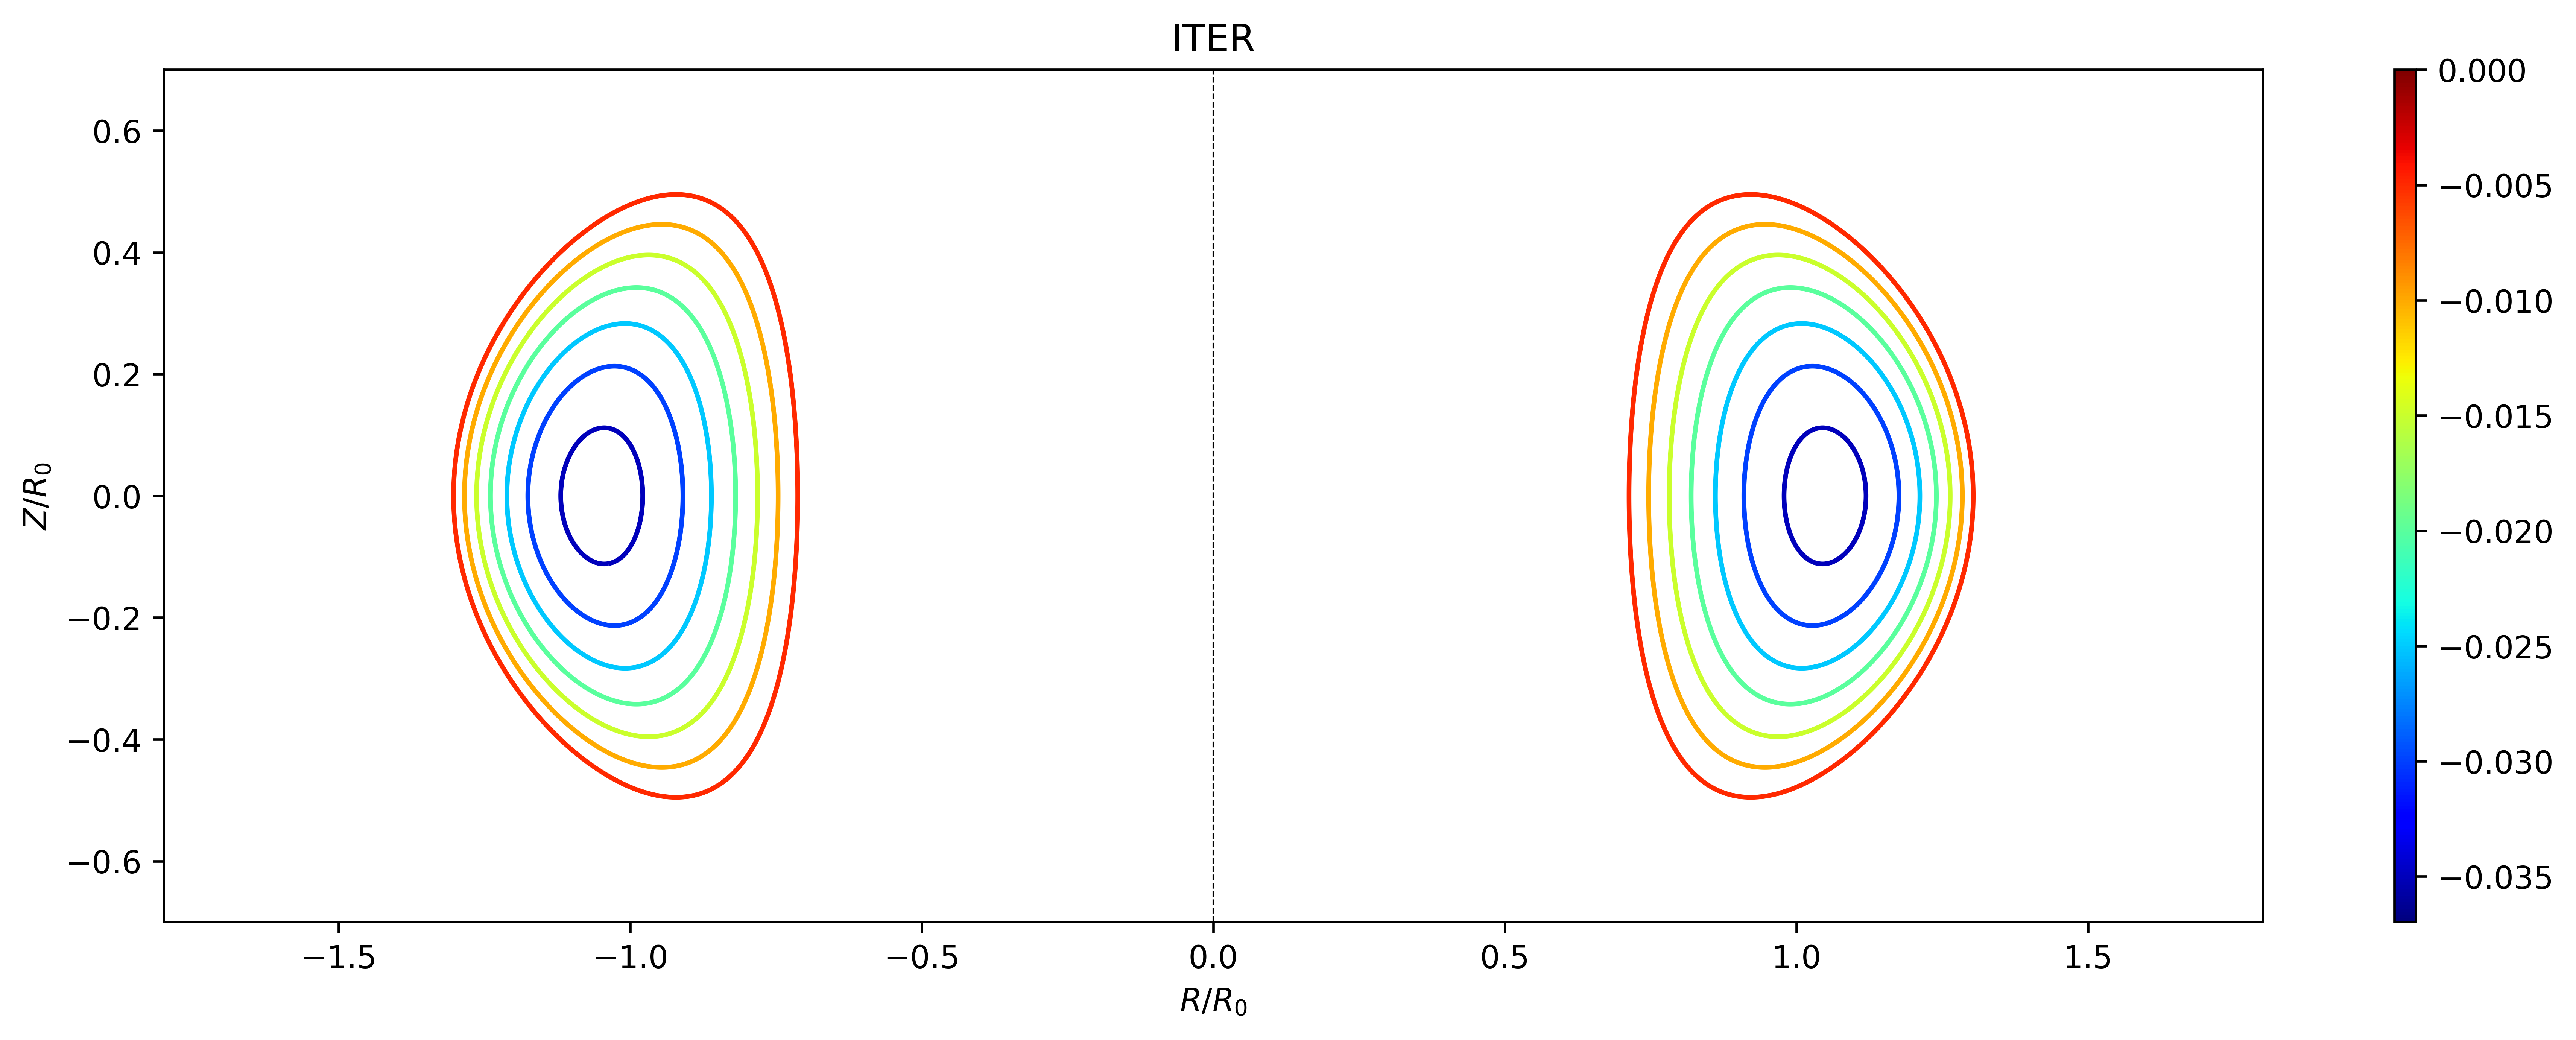

In [6]:
from matplotlib.pyplot import colorbar, Normalize, show, subplots
from matplotlib.cm import ScalarMappable, jet, inferno
plt.rcParams['figure.dpi'] = 600

# Plot psi_true
fig,ax=plt.subplots(1,1,figsize=(15,5))
norm = Normalize(vmin=np.min(psi_true), vmax=0)
cmap = jet
sm = ScalarMappable(cmap=cmap, norm=norm)
cp = ax.contour(x, y, psi_true,norm=norm,cmap=cmap)

ax.set_title('ITER')
ax.set_xlabel('$R/R_{0}$')
ax.set_ylabel('$Z/R_{0}$')
ax.axis(xmin=-1.8,xmax=1.8,ymin=-0.7, ymax=0.7)
ax.axvline(x=0.0, linestyle='--', linewidth=0.5, color='black')

colorbar(sm, aspect=40)
plt.show()

